In [1]:
import matplotlib.pyplot as plt
import numpy as np

from AOS_integrator import create_integral_image
import cv2
import json

In [2]:
# open the json generated by "generate_data_json.py"
with open("data.json", "r") as f:
    files = json.load(f)

In [3]:
# overview of the data structure
for batch in files:
    print(batch)
    for image_id in files[batch]:
        print(f"\t{image_id}")
        for key in files[batch][image_id]:
            print(f"\t\t{key}")
            if key == "raw_images":
                for i in range(len(files[batch][image_id][key])):
                    print(f"\t\t\t{files[batch][image_id][key][i]}")
            else:
                print(f"\t\t\t{files[batch][image_id][key]}")
        break
    break
    

..\..\data\download\batch_20230912_part1-006\Part1
	0_0
		GT
			..\..\data\download\batch_20230912_part1-006\Part1\0_0_GT_pose_0_thermal.png
		raw_images
			..\..\data\download\batch_20230912_part1-006\Part1\0_0_pose_0_thermal.png
			..\..\data\download\batch_20230912_part1-006\Part1\0_0_pose_10_thermal.png
			..\..\data\download\batch_20230912_part1-006\Part1\0_0_pose_1_thermal.png
			..\..\data\download\batch_20230912_part1-006\Part1\0_0_pose_2_thermal.png
			..\..\data\download\batch_20230912_part1-006\Part1\0_0_pose_3_thermal.png
			..\..\data\download\batch_20230912_part1-006\Part1\0_0_pose_4_thermal.png
			..\..\data\download\batch_20230912_part1-006\Part1\0_0_pose_5_thermal.png
			..\..\data\download\batch_20230912_part1-006\Part1\0_0_pose_6_thermal.png
			..\..\data\download\batch_20230912_part1-006\Part1\0_0_pose_7_thermal.png
			..\..\data\download\batch_20230912_part1-006\Part1\0_0_pose_8_thermal.png
			..\..\data\download\batch_20230912_part1-006\Part1\0_0_pose_9_thermal.pn

..\..\data\download\batch_20231027_Part1-001\Part1 2_5082


C:\Users\pauld\OneDrive - Johannes Kepler Universität Linz\Master\Semester1\Computer Vision\project\cv_proj\generate_integral_images\AOS_integrator.py:55: RuntimeWarning: invalid value encountered in true_divide
  return rimg2[:, :, :3] / a


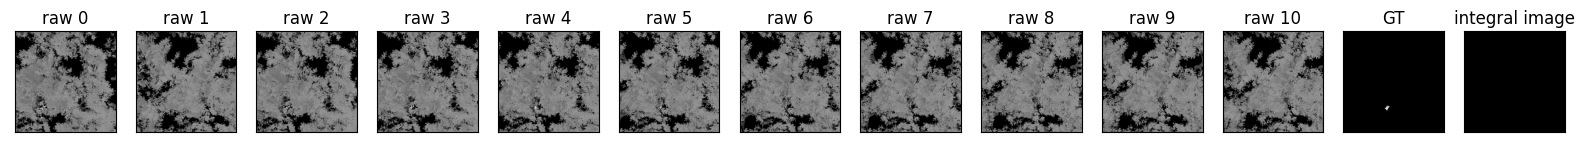

In [9]:
# test with some images
batch = r"..\..\data\download\batch_20231027_Part1-001\Part1"
image_id = "2_5082"
print(batch, image_id)
test_image = files[batch][image_id]["raw_images"]
GT_image = files[batch][image_id]["GT"]

integral_image = create_integral_image(test_image, focal_plane=0)
# save the integral image cv2
cv2.imwrite("integral_image.png", integral_image)
# show images
raw = [cv2.imread(t) for t in test_image]
gt = cv2.imread(GT_image)
# gt = cv2.cvtColor(gt, cv2.COLOR_BGR2RGB)
ii = cv2.imread("integral_image.png")
# ii = cv2.cvtColor(ii, cv2.COLOR_BGR2RGB)

# show the 11 raw images in a row
# then the gt and integral image next to each other
fig, ax = plt.subplots(1, 13, figsize=(20, 10))
for i in range(11):
    ax[i].imshow(raw[i])
    ax[i].set_title(f"raw {i}")
ax[11].imshow(gt)
ax[11].set_title("GT")
ax[12].imshow(ii)
ax[12].set_title("integral image")
# remove axis labels
for a in ax:
    a.set_xticks([])
    a.set_yticks([])


plt.show()

In [5]:
# image shapes
print(raw[0].shape)
print(gt.shape)
print(ii.shape)

(512, 512, 3)
(512, 512, 3)
(512, 512, 3)


In [6]:
# check dimension values
import numpy as np
 
# check all channel combinations of the raw images
from itertools import combinations

for c1, c2 in combinations([0,1,2], 2):
    for i in range(len(raw)):
        assert np.allclose(raw[i][:,:,c1], raw[i][:,:,c2])
    assert np.allclose(gt[:,:,c1], gt[:,:,c2])
    assert np.allclose(ii[:,:,c1], ii[:,:,c2])


## For all images the channels are the same thus we can remove the channel dimension

In [7]:
import torch
import torchvision

In [8]:
# load some the image
raw_example_path = r"..\\..\\data\\download\\batch_20230912_part1-006\\Part1\\0_0_pose_0_thermal.png"
gt_example_path = r"..\\..\\data\\download\\batch_20230912_part1-006\\Part1\\0_0_GT_pose_0_thermal.png"
integral_example_path = r"..\\..\\data\\integral_images\\batch_20230912_part1-006\\Part1\\0_0\\0_0_integral_fp-0.5.png"

# use torch to load the images
raw_example= torchvision.io.read_image(raw_example_path)
gt_example = torchvision.io.read_image(gt_example_path)
integral_example = torchvision.io.read_image(integral_example_path, mode=torchvision.io.image.ImageReadMode.GRAY)
integral_example2 = torchvision.io.read_image(integral_example_path)

# shape of the images
print(raw_example.shape)
print(gt_example.shape)
print(integral_example.shape)
print(integral_example2.shape)

torch.allclose(integral_example, integral_example2[0])

torch.Size([1, 512, 512])
torch.Size([1, 512, 512])
torch.Size([1, 512, 512])
torch.Size([3, 512, 512])


True